In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv("nba2k20-full.csv")

In [46]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [47]:
df.shape

(429, 14)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.1+ KB


In [49]:
df=df.dropna()

In [50]:
df=df.drop(columns=['full_name','b_day','height','weight','college'])

In [51]:
df.sample(5)

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
408,70,#30,Oklahoma City Thunder,G,$1416852,USA,2014,Undrafted,Undrafted
244,74,#33,Portland Trail Blazers,C,$4240200,USA,2017,1,10
268,74,#45,Chicago Bulls,G,$3377568,USA,2016,1,14
209,75,#21,Brooklyn Nets,F-G,$2564753,USA,2007,1,23
51,84,#0,Los Angeles Lakers,F,$1974600,USA,2017,1,27


In [52]:
df.isnull().sum()

rating         0
jersey         0
team           0
position       0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
dtype: int64

In [53]:
## removing # and $ symbol in jersey and salary col
def removehashanddollar(value):
    value=value[1:]
    return int(value)
df['jersey']=df['jersey'].apply(removehashanddollar)

In [55]:
df['salary']=df['salary'].apply(removehashanddollar)

In [56]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [58]:
df['team'].value_counts()

team
New Orleans Pelicans      14
Los Angeles Lakers        14
Indiana Pacers            14
Milwaukee Bucks           14
Orlando Magic             14
Chicago Bulls             13
New York Knicks           13
Phoenix Suns              12
Sacramento Kings          12
Brooklyn Nets             12
San Antonio Spurs         12
Los Angeles Clippers      12
Detroit Pistons           12
Minnesota Timberwolves    12
Philadelphia 76ers        12
Memphis Grizzlies         12
Houston Rockets           12
Denver Nuggets            12
Dallas Mavericks          11
Atlanta Hawks             11
Toronto Raptors           11
Boston Celtics            11
Miami Heat                11
Cleveland Cavaliers       10
Washington Wizards        10
Oklahoma City Thunder      9
Portland Trail Blazers     9
Utah Jazz                  8
Golden State Warriors      8
Charlotte Hornets          7
Name: count, dtype: int64

In [59]:
df['country'].value_counts()

country
USA                   294
Canada                 15
Australia               7
Nigeria                 3
The Bahamas             2
Ukraine                 2
Cameroon                2
Mali                    1
Egypt                   1
Haiti                   1
Angola                  1
Germany                 1
Italy                   1
United Kingdom          1
Japan                   1
Israel                  1
Austria                 1
Senegal                 1
Puerto Rico             1
Philippines             1
Lithuania               1
New Zealand             1
Finland                 1
Dominican Republic      1
Montenegro              1
Greece                  1
Name: count, dtype: int64

In [62]:
## removing countryoutlier 
def countryoutlier(value):
    if value not in ['USA','Canada','Australia']:
        return 'Others'
    else:
        return value
df['country'] = df['country'].apply(countryoutlier)
df['country'].value_counts()
   

country
USA          294
Others        28
Canada        15
Australia      7
Name: count, dtype: int64

In [63]:
df['position'].value_counts()

position
G      151
F      117
C       29
F-C     24
G-F     11
F-G      7
C-F      5
Name: count, dtype: int64

In [64]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1


In [65]:
df['draft_round'].unique

<bound method Series.unique of 1              1
3              1
4              1
5              1
6              1
         ...    
423            2
424    Undrafted
425            2
426    Undrafted
428    Undrafted
Name: draft_round, Length: 344, dtype: object>

In [66]:
df['draft_peak'].unique

<bound method Series.unique of 1             15
3              2
4              3
5              7
6              1
         ...    
423           58
424    Undrafted
425           60
426    Undrafted
428    Undrafted
Name: draft_peak, Length: 344, dtype: object>

In [67]:
def removeundrafted(value):
    if value=='Undrafted':
        return 
    else:
        return value
    
df['draft_round'] = df['draft_round'].apply(removeundrafted)
df['draft_peak'] = df['draft_peak'].apply(removeundrafted)

df = df.dropna()

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['position']=le.fit_transform(df['position'])
df['country']=le.fit_transform(df['country'])
df['team']=le.fit_transform(df['team'])

df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,3,2011,1,15
3,96,7,2,2,37199000,3,2007,1,2
4,96,13,10,5,38199000,3,2009,1,3
5,95,30,9,5,40231758,3,2009,1,7
6,94,3,13,3,27093019,3,2012,1,1


In [70]:
df.shape

(292, 9)

In [71]:
X=df.drop(columns='salary')
y=df['salary']

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

In [77]:
diff=y_test-predictions

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_17904\1670086357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary', ylabel='Density'>

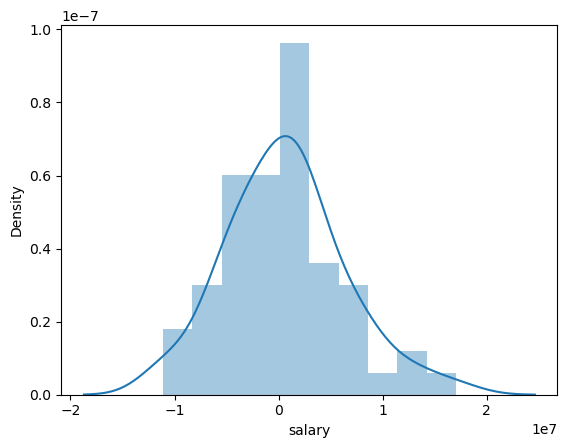

In [79]:
import seaborn as sns
sns.distplot(diff)

In [82]:
import pickle

# open a file, where you ant to store the data
file = open('Linear_Regression.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)